In [176]:
import random
import matplotlib.pyplot as plt

class CurrencySystemGame:
    def __init__(self, defender_coins, attacker_coins, target_range_1, target_range_2, target_range_3, num_periods):
        self.defender_coins = defender_coins  # number of defender's coins
        self.attacker_coins = attacker_coins  # number of attacker's coins
        self.target_range_1 = target_range_1  # |+-0.01|
        self.target_range_2 = target_range_2  # |+-0.02|
        self.target_range_3 = target_range_3  # |+-0.05|
        self.num_periods = num_periods  # number of attack-defense
        self.coin_value = 1.0  # Initial coin value
        self.coin_values = [self.coin_value]  # Keep track of coin values over time
        self.defender_holdings = [defender_coins]  # Keep track of defender's coin holdings over time
        self.attacker_holdings = [attacker_coins]  # Keep track of attacker's coin holdings over time

    def play(self):
        for i in range(self.num_periods):
            # Attacker buys or sells coins
            attacker_action = random.uniform(-0.05, 0.05) * self.attacker_coins  # randomly buy or sell coins
            self.coin_value += attacker_action / (self.defender_coins + self.attacker_coins)  # the value of the coin is increased in proportion to the attacker's action
            self.attacker_coins += attacker_action

            # Record coin value after attacker's action
            self.coin_values.append(self.coin_value)

            # Defender buys or sells coins to stabilize value 1
            defender_action = 0
            if (self.coin_value < (1 - self.target_range_1) or self.coin_value > (1 + self.target_range_1)) and (self.coin_value <= (1 - self.target_range_2) or self.coin_value >= (1 + self.target_range_2)):
                defender_action = -(attacker_action * 0.5)
                self.defender_coins += defender_action

            # Record coin value after defender's action
            self.coin_value += defender_action / (self.defender_coins + self.attacker_coins)

            # Defender buys or sells coins to stabilize value 2
            if self.coin_value < (1 - self.target_range_2) or self.coin_value > (1 + self.target_range_2):
                defender_action = -(attacker_action * 2) # Defender's strategy important!!
                self.defender_coins += defender_action

            # Record coin value after defender's action
            self.coin_value += defender_action / (self.defender_coins + self.attacker_coins)

            # Record coin holdings at end of period
            self.defender_holdings.append(self.defender_coins)
            self.attacker_holdings.append(self.attacker_coins)

            # Check if game is over (attacker wins if value outside target range for 10 periods)
            if i <= self.num_periods and (self.coin_value < (1 - self.target_range_3) or self.coin_value > (1 + self.target_range_3)):
                print("Attacker wins!")
                break

        # If game not over, defender wins
        else:
            print("Defender wins!")

        # Plot coin value and coin holdings over time
        fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
        ax[0].plot(self.coin_values)
        ax[0].axhline(y=1-self.target_range_1, color='g', linestyle='--')
        ax[0].axhline(y=1+self.target_range_1, color='g', linestyle='--')
        ax[0].axhline(y=1-self.target_range_2, color='b', linestyle='--')
        ax[0].axhline(y=1+self.target_range_2, color='b', linestyle='--')
        ax[0].axhline(y=1-self.target_range_3, color='r', linestyle='--')
        ax[0].axhline(y=1+self.target_range_3, color='r', linestyle='--')
        ax[0].set_ylabel("Coin Value")
        ax[1].plot(self.defender_holdings, label="Defender")
        ax[1].plot(self.attacker_holdings, label="Attacker")
        ax[1].set_xlabel("Periods")
        ax[1].set_ylabel("Coin Holdings")
        ax[1].legend()
        plt.show()


Defender wins!


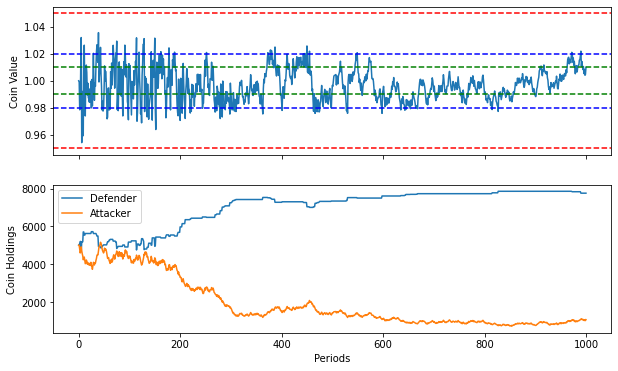

In [180]:
game = CurrencySystemGame(defender_coins=5000, attacker_coins=5000, target_range_1=0.01, target_range_2=0.02, target_range_3=0.05, num_periods=1000)
game.play()
